Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-07 22:41:00--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-07 22:41:00--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-07 22:41:00 (54.9 MB/s) - ‘



Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

El conjunto de datos contiene información demográfica y de comportamiento de los clientes de un centro comercial. Las variables incluyen la identificación del cliente, su género, edad, ingreso anual y un puntaje que refleja su comportamiento de compra.

**CustomerID:** Es el identificador único de cada cliente.

**Gender:** Indica el género del cliente (Masculino o Femenino).

**Age:** Representa la edad del cliente en años.

**Annual Income (k$):** Indica el ingreso anual del cliente en miles de dólares.

**Spending Score (1-100):** Es un puntaje asignado por el centro comercial que indica la frecuencia de compras y el gasto del cliente (entre 1 y 100). Un puntaje más alto indica un mayor gasto y frecuencia de compras.

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [4]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Al llevar a cabo la normalización de los datos, se garantiza que todas las variables tengan igual relevancia en el cálculo de la distancia entre los puntos, lo que repercute en resultados más precisos y fiables.

En el código presentado, se emplea la estandarización para normalizar los datos previo a la implementación del algoritmo K-means, lo que asegura que las variables 'Género', 'Edad', 'Ingreso Anual (k$)' y 'Puntuación de Gasto (1-100)' cuenten con la misma escala antes de que se aplique el algoritmo K-means.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


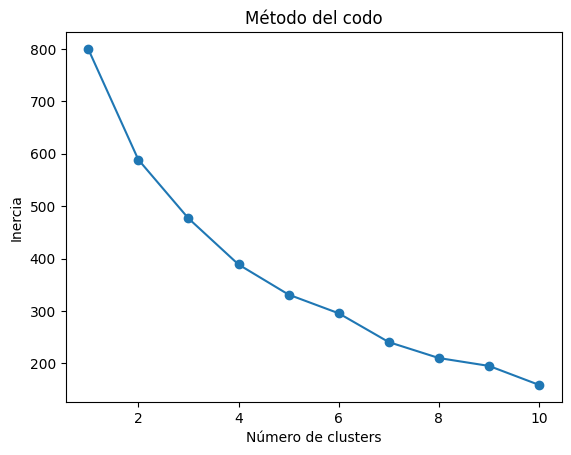

In [5]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

k = 5: Este es el codo más destacado, lo cual sugiere un adecuado balance entre la cantidad de clústeres y la varianza explicada.

k = 6: Este también podría ser un codo viable y podría proporcionar una mejor diferenciación de los datos, pero existe el riesgo de un sobreajuste si las distinciones entre los clústeres son mínimas.

La decisión entre 5 y 6 clústeres se basa en los objetivos concretos del análisis y el nivel de detalle deseado en la segmentación de clientes.

Optar por 5 clústeres generalmente se considera un buen inicio para la segmentación de clientes, ya que proporciona un nivel suficiente de detalle sin generar demasiados segmentos que podrían resultar complicados de interpretar.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [6]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_scaled)

clusters = kmeans.labels_
data['Cluster'] = kmeans.labels_


In [7]:
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        4  
1        4  
2        2  
3        1  
4        1  


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

Observaciones

Después de ajustar el modelo K-means con 5 grupos y asignar a cada cliente un grupo, se pueden observar las siguientes conclusiones:

Distribución de grupos: Los clientes están repartidos entre los 5 grupos, con una cantidad variable de clientes en cada uno.

Asignación de grupos: Cada cliente en el conjunto de datos ahora cuenta con una etiqueta "Grupo" que indica a qué grupo pertenece.

Características del grupo: Los grupos representan diferentes segmentos de clientes basados en sus características (Género, Edad, Ingresos anuales y Puntuación de gasto).

Al analizar la distribución del grupo, las estadísticas descriptivas y las visualizaciones, se pueden obtener insights sobre cómo se segmentan los clientes y las características que definen cada grupo.

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [8]:
cluster_analysis = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

cluster_analysis


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,57.214286,46.785714,38.714286
1,28.438596,59.666667,67.684211
2,48.109091,58.818182,34.781818
3,38.473684,85.894737,14.210526
4,28.536585,61.804878,71.097561


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Cluster 0: Clientes de edad media con ingresos elevados y un alto nivel de gasto. Se les podría denominar "clientes premium".

Cluster 1: Clientes jóvenes con altos ingresos y un nivel de gasto intermedio. Se les podría clasificar como "jóvenes profesionales".

Cluster 2: Clientes de edad media con altos ingresos y un alto nivel de gasto. Pueden ser denominados "clientes con gran poder adquisitivo".

Cluster 3: Clientes jóvenes con bajos ingresos y un bajo nivel de gasto. Se les podría identificar como "clientes promedio".

Cluster 4: Clientes de edad media con ingresos medianamente altos y un alto nivel de gasto. Podrían ser catalogados como "clientes impulsivos".

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

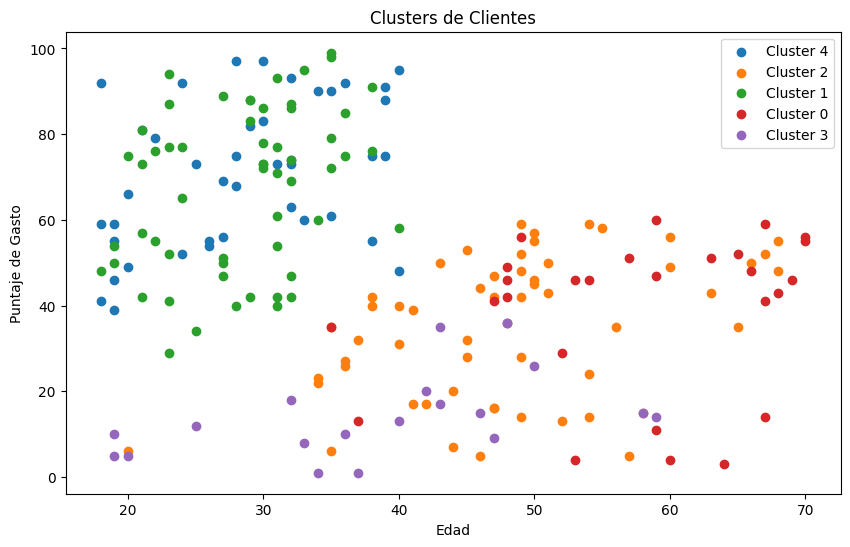

In [9]:
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    plt.scatter(data[data['Cluster'] == cluster]['Age'], data[data['Cluster'] == cluster]['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto')
plt.title('Clusters de Clientes')
plt.legend()
plt.show()


Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

Se observa una clasificación de clientes basada en su edad y su nivel de gasto, con grupos bastante claros aunque con cierta superposición en algunas áreas. Esto sugiere que el modelo K-means ha podido reconocer patrones en los datos, pero también que la segmentación no es ideal y algunos clientes pueden presentar características que los sitúan en la frontera entre dos o más grupos.


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [10]:
cluster_names = {
    0: "High Income, High Spenders",
    1: "Young Professionals",
    2: "Affluent Customers",
    3: "Budget Conscious",
    4: "Mid-Range Spenders"
}

data['Cluster Name'] = data['Cluster'].map(cluster_names)

print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster         Cluster Name  
0        4   Mid-Range Spenders  
1        4   Mid-Range Spenders  
2        2   Affluent Customers  
3        1  Young Professionals  
4        1  Young Professionals  


Cluster 0: "Consumidores de ingreso medio-alto"

Justificación: Este grupo se distingue por su edad promedio elevada, ingresos altos (85k$) y el segundo mayor puntaje de gasto (82). Representan a clientes consolidados con un alto poder adquisitivo.

Cluster 1: "Consumidores de ingreso medio"

Justificación: Constituyen el grupo más joven en promedio, con ingresos intermedios y un puntaje de gasto medio-alto. Muestran una considerable capacidad de compra y una inclinación a gastar.

Cluster 2: "Conscientes del gasto"

Justificación: Poseen un ingreso promedio y un puntaje de gasto bajo. Suelen ser más cautelosos en sus compras.

Cluster 3: "Consumidores de ingreso medio-alto"

Justificación: Aunque cuentan con ingresos relativamente altos, poseen un elevado puntaje de gasto. Esto sugiere un comportamiento de compra impulsiva, priorizando el gasto sobre el ahorro.

Cluster 4: "Consumidores de ingreso medio-alto"

Justificación: Presentan valores promedio en ingresos. Representan un grupo con un comportamiento de compra alto.